In [1]:
import numpy as np

from scipy.stats.distributions import beta
from scipy.integrate import simps

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Hierarchical Models

Consider a _factory_ with some bias $\omega$ producing coins with weights $\{\theta_i\}$.  We found that we can factor the posterior in the following way

$$
p(\theta,\omega|y) = \frac{p(y|\theta)p(\theta|\omega)p(\omega)}{p(y)}
$$

## Prior

The prior, $p(\theta,\omega) = p(\theta|\omega)p(\omega)$, is the product of two beta distributions

$$
p(\theta|\omega)p(\omega) = \mathrm{beta}(\theta|\omega(K-2)+1,(1-\omega)(K-2)+1)\mathrm{beta}(\omega|A_\omega,B_\omega)
$$

In [2]:
def prior(theta, omega, A_omega=2, B_omega=2, K=100):
    p = beta.pdf(omega, A_omega, B_omega)
    p *= beta.pdf(theta, omega * (K - 2) + 1, (1 - omega) * (K - 2) + 1)
    return p

First lets look at the prior, with $A_\omega = 2,B_\omega=2$, and $K=100$.

In [3]:
A_omega = 2
B_omega = 2
K = 5

theta = np.linspace(0, 1, 100)
omega = np.linspace(0, 1, 100)

THETA, OMEGA = np.meshgrid(theta, omega)
PRIOR = prior(THETA, OMEGA, A_omega=A_omega, B_omega=B_omega, K=K)

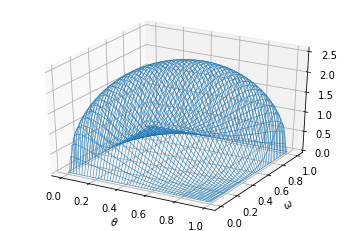

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(THETA, OMEGA, PRIOR, lw=.5)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\omega$");

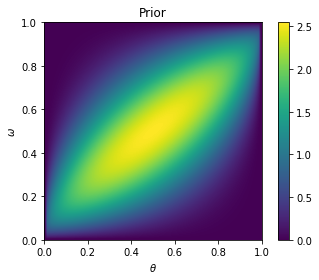

In [6]:
plt.figure()
plt.imshow(PRIOR, extent=(0,1,0,1), origin='lower', interpolation='bilinear')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\omega$")
plt.colorbar()
plt.title("Prior");

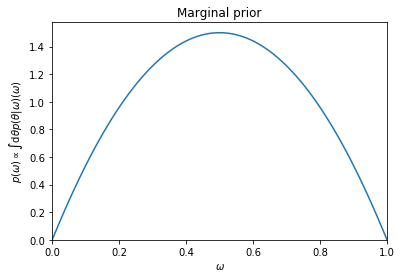

In [7]:
plt.figure()

omega_marg_prior = simps(PRIOR, THETA)
omega_marg_prior /= simps(omega_marg_prior, omega) 

plt.plot(omega, omega_marg_prior)
plt.xlim(0, 1)
plt.ylim(ymin=0)
plt.ylabel(r"$p(\omega)\propto \int\mathrm{d} \theta p(\theta|\omega)(\omega)$")
plt.xlabel(r"$\omega$")
plt.title("Marginal prior");

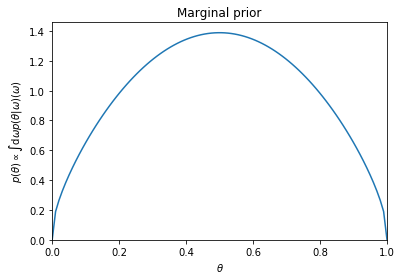

In [8]:
plt.figure()

theta_marg_prior = simps(PRIOR.T, OMEGA.T)
theta_marg_prior /= simps(theta_marg_prior, theta)

plt.plot(theta, theta_marg_prior)
plt.xlim(0, 1)
plt.ylim(ymin=0)
plt.ylabel(r"$p(\theta)\propto \int\mathrm{d} \omega p(\theta|\omega)(\omega)$")
plt.xlabel(r"$\theta$")
plt.title("Marginal prior");

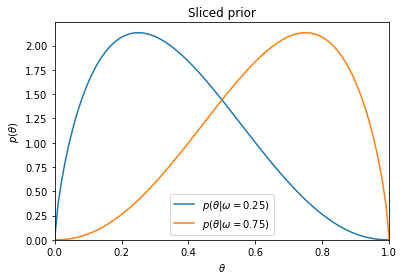

In [9]:
plt.figure()

fixed_omegas = [0.25, 0.75]

for fixed_omega in fixed_omegas:
    theta_slice_prior = prior(theta, fixed_omega, A_omega=A_omega, B_omega=B_omega, K=K).T

    plt.plot(theta, theta_slice_prior, label=r"$p(\theta|\omega={})$".format(fixed_omega))

plt.legend()
plt.xlim(0, 1)
plt.ylim(ymin=0)
plt.ylabel(r"$p(\theta)$")
plt.xlabel(r"$\theta$")
plt.title("Sliced prior");